# **Submission 1 - Predictive Analysis**

**Nama : Rafii Ahmad Fahreza**
**<br>Email : rafifahreza1908@gmail.com**
**<br>Dataset: https://www.kaggle.com/datasets/atharvasoundankar work-from-anywhere-salary-insight-2024/data**


# **Domain Proyek**

Dalam beberapa tahun terakhir, terutama pasca pandemi COVID-19, dunia kerja mengalami perubahan signifikan dengan meningkatnya adopsi sistem kerja remote dan hybrid. Pergeseran ini tidak hanya mengubah cara bekerja, tetapi juga menimbulkan tantangan baru dalam hal penentuan struktur penggajian. Ketika batasan geografis menjadi semakin kabur, muncul pertanyaan tentang seberapa besar pengaruh lokasi, pengalaman, dan jenis pekerjaan terhadap besaran gaji. Apakah pekerja remote di negara berkembang harus dibayar lebih rendah daripada mereka yang tinggal di pusat ekonomi global, meskipun memiliki keterampilan serupa? Bagaimana perusahaan dapat menetapkan gaji yang adil dan kompetitif dalam konteks kerja lintas batas ini? Proyek ini bertujuan untuk membangun model prediktif yang dapat memperkirakan besaran gaji tahunan berdasarkan berbagai karakteristik pekerjaan seperti jabatan, industri, lokasi, pengalaman kerja, dan fleksibilitas kerja. Pendekatan ini tidak hanya penting untuk membantu perusahaan dalam pengambilan keputusan berbasis data, tetapi juga memberi wawasan kepada para pekerja dalam memahami nilai pasar mereka di era kerja jarak jauh.

# **Business Understanding**

### **Problem Statement**

Transformasi sistem kerja menuju model remote, hybrid, dan onsite memunculkan tantangan baru dalam pengelolaan struktur gaji. Tanpa standar yang jelas, perusahaan sering kali menetapkan gaji berdasarkan asumsi atau pendekatan tradisional yang kurang relevan dalam konteks kerja jarak jauh. Akibatnya, muncul ketimpangan dalam kompensasi berdasarkan lokasi, jabatan, atau tingkat pengalaman yang tidak sepenuhnya mencerminkan nilai sebenarnya dari peran tersebut.

### **Goals**

Proyek ini bertujuan untuk membangun model prediktif yang dapat memperkirakan gaji tahunan berdasarkan fitur-fitur pekerjaan seperti jabatan, industri, lokasi, jenis pekerjaan, fleksibilitas kerja, dan pengalaman kerja. Model ini diharapkan dapat memberikan wawasan objektif bagi perusahaan dalam menyusun struktur penggajian yang adil serta membantu individu dalam memahami ekspektasi gaji berdasarkan profil profesional mereka.

### **Solution Statement**

Untuk mencapai tujuan tersebut, proyek ini akan:
Mengembangkan dua model prediksi menggunakan algoritma yang berbeda, seperti

1. Random Forest Regressor dan Gradient Boosting (XGBoost).
2. Memilih Model terbaik berdasarkan metrik regresi seperti MAE, RMSE, dan R² Score.







# **Data Understanding**

Dataset yang digunakan dalam proyek ini berjudul “Work From Anywhere Salary Data”, yang terdiri dari 500 data terstruktur mengenai individu yang bekerja secara remote, hybrid, maupun onsite. Data ini mencakup berbagai jabatan, industri, tingkat pengalaman, lokasi kerja, serta informasi mengenai penggajian. Dataset ini bersifat sintetis namun merepresentasikan pola dan tren yang lazim di dunia kerja global saat ini.

Sumber Data:
[link dataset](https://raw.githubusercontent.com/rfahreza/Predictive-Analytic/main/Work_From_Anywhere_Salary_Data.csv)

| Kolom                             | Deskripsi                                                                       |
| --------------------------------- | ------------------------------------------------------------------------------- |
| **Company**                       | Nama organisasi tempat individu bekerja                                         |
| **Job Title**                     | Jabatan individu (misalnya: Software Engineer, Product Manager)                 |
| **Industry**                      | Sektor industri (misalnya: Teknologi, Finansial, Kesehatan)                     |
| **Location**                      | Lokasi geografis kerja (kota dan/atau negara)                                   |
| **Employment Type**               | Jenis pekerjaan (Full-time, Part-time, Contract, Internship)                    |
| **Experience Level**              | Tingkat senioritas (Entry, Mid, Senior, Lead)                                   |
| **Remote Flexibility**            | Tipe kerja: Remote, Hybrid, atau Onsite                                         |
| **Salary (Annual)**               | Gaji tahunan kotor sebelum pajak                                                |
| **Currency**                      | Mata uang pembayaran gaji (misalnya: USD, EUR, INR)                             |
| **Years of Experience**           | Total tahun pengalaman profesional individu                                     |
| **Job Satisfaction Score (1–10)** | Skor kepuasan kerja individu dari 1 (sangat tidak puas) hingga 10 (sangat puas) |
| **Tech Stack**                    | Teknologi yang digunakan (misalnya: Python, JavaScript, SQL, dsb.)              |
| **Perks**                         | Tunjangan tambahan yang diberikan (misalnya: asuransi, WFH allowance)           |
| **Last Promotion (Years Ago)**    | Jumlah tahun sejak terakhir kali individu dipromosikan                          |


## **1. Import Library**

Import library yang digunakan di projek ini

In [88]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **2. Data Loading**

Menggunakan dataset dari github

In [89]:
url = 'https://raw.githubusercontent.com/rfahreza/Predictive-Analytic/main/Work_From_Anywhere_Salary_Data.csv'

In [90]:
df = pd.read_csv(url)

In [91]:
df.head(10)

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82
5,Tesla,Product Manager,Media,Chicago,Part-time,Senior,Remote,68938.17,USD,12.1,7,"Java, Spring",Stock Options,1.05
6,IBM,DevOps Engineer,Healthcare,New York,Internship,Lead,Onsite,108004.81,INR,2.1,9,"Go, Kubernetes",Flexible Hours,3.74
7,Tesla,Data Scientist,Education,Austin,Part-time,Mid,Onsite,113897.69,USD,12.9,3,"C#, .NET",Health Insurance,3.96
8,Tesla,Data Scientist,Tech,Seattle,Internship,Lead,Onsite,72740.40,AUD,12.9,1,"C#, .NET",Stock Options,3.41
9,Salesforce,Product Manager,Media,Austin,Full-time,Senior,Hybrid,56886.82,USD,14.3,5,"Go, Kubernetes",Health Insurance,2.54


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        500 non-null    object 
 1   Job Title                      500 non-null    object 
 2   Industry                       500 non-null    object 
 3   Location                       500 non-null    object 
 4   Employment Type                500 non-null    object 
 5   Experience Level               500 non-null    object 
 6   Remote Flexibility             500 non-null    object 
 7   Salary (Annual)                500 non-null    float64
 8   Currency                       500 non-null    object 
 9   Years of Experience            500 non-null    float64
 10  Job Satisfaction Score (1-10)  500 non-null    int64  
 11  Tech Stack                     500 non-null    object 
 12  Perks                          500 non-null    obj

Berdasarkan informasi diatas dataset ini memiliki **500 baris** data dengan total **14 kolom**

In [93]:
print(df.describe())

       Salary (Annual)  Years of Experience  Job Satisfaction Score (1-10)  \
count       500.000000           500.000000                     500.000000   
mean     115390.108680             7.382000                       5.660000   
std       47781.533743             4.209793                       2.912966   
min       30248.550000             0.000000                       1.000000   
25%       75025.795000             3.800000                       3.000000   
50%      111953.730000             7.350000                       6.000000   
75%      156244.655000            10.925000                       8.000000   
max      199927.240000            15.000000                      10.000000   

       Last Promotion (Years Ago)  
count                  500.000000  
mean                     2.415560  
std                      1.462838  
min                      0.000000  
25%                      1.057500  
50%                      2.360000  
75%                      3.692500  
max      

Keterangan Kolom Statistik
*   `count`: Jumlah nilai non-null.
*   `mean`: Rata-rata dari nilai-nilai dalam kolom.
*   `std`: Standar deviasi, menunjukkan sebaran data dari nilai rata-rata.
*   `min`: Nilai minimum.
*   `25%`: Kuartil pertama (Q1) — 25% data berada di bawah nilai ini.
*   `50% (median)`: Kuartil kedua — nilai tengah dari data.
*   `75%`: Kuartil ketiga (Q3) — 75% data berada di bawah nilai ini.
*   `max`: Nilai maksimum.



### Visualisasi Data

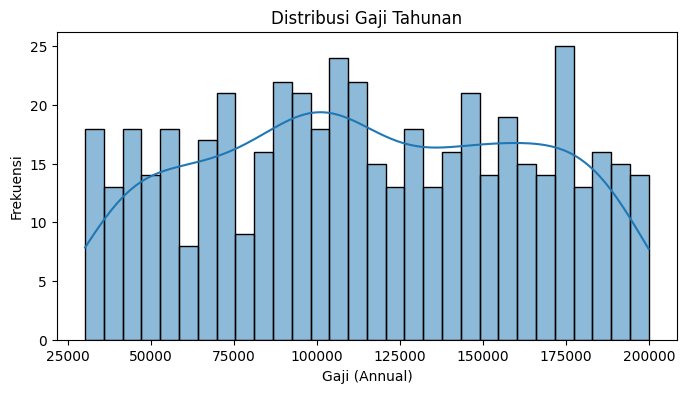

In [94]:
# Histogram distribusi gaji
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary (Annual)'], bins=30, kde=True)
plt.title("Distribusi Gaji Tahunan")
plt.xlabel("Gaji (Annual)")
plt.ylabel("Frekuensi")
plt.show()

**Insight**
1. Gaji berkisar dari sekitar $25.000 hingga $200.000.
2. Gaji tidak tersebar merata, ada banyak orang di beberapa kelompok gaji dan lebih sedikit di kelompok lain.
3. Ada beberapa rentang gaji di mana frekuensinya lebih rendah, contohnya di sekitar $65.000 - $70.000 dan $130.000 - $135.000.
4. Gaji tahunan yang paling banyak berada di kisaran: $115.000 - $120.000 dan $170.000 - $175.000

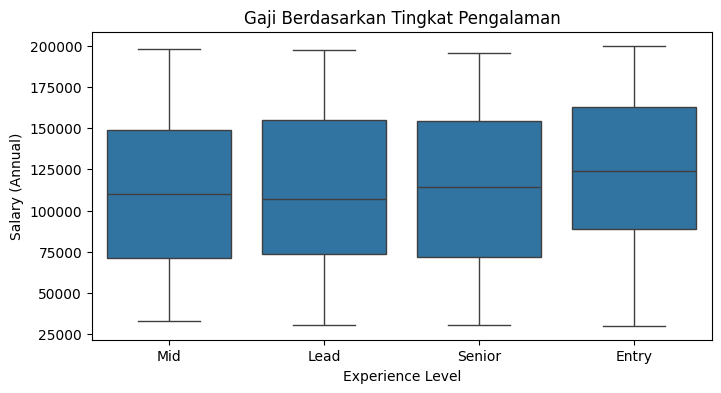

In [95]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Experience Level', y='Salary (Annual)', data=df)
plt.title("Gaji Berdasarkan Tingkat Pengalaman")
plt.xlabel("Experience Level")
plt.ylabel("Salary (Annual)")
plt.show()

**Insight**
1. Gaji Median 'Entry' Level adalah yang Paling Tinggi, bahkan lebih tinggi dari 'Mid', 'Lead', dan 'Senior'. Ini tidak biasa, perlu melakukan identifikasi faktor yang menyebabkan ini.
2. Gaji Median 'Mid', 'Lead', dan 'Senior' Hampir Sama, tidak menunjukkan kenaikan signifikan dengan pengalaman.
3. Rentang Gaji Luas di semua level, artinya ada variasi besar dalam gaji di setiap kategori pengalaman.

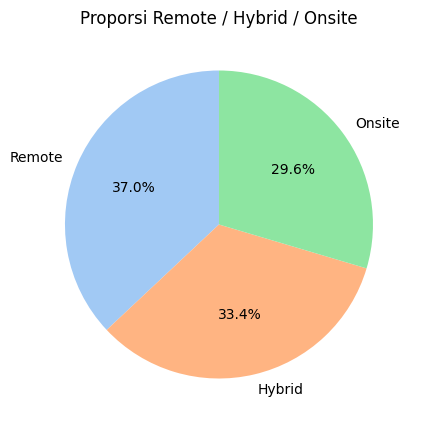

In [96]:
plt.figure(figsize=(5, 5))
df['Remote Flexibility'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Proporsi Remote / Hybrid / Onsite")
plt.ylabel('')
plt.show()

Insight
1. Remote menjadi mode kerja yang mendominasi, dengan proporsi terbesar yaitu 37.0%.
2. Proporsi Hybrid dan Onsite tidak terlalu jauh berbeda dengan Remote.
3. Mode kerja fleksibel (Remote + Hybrid) menjadi semakin populer (sekitar 70.4%) dibandingkan dengan mode kerja Onsite penuh.

# **Data Preparation**

## Memeriksa Missing Value

Untuk menjaga kualitas data dan akurasi model prediktif


In [97]:
df.isnull().sum()

,0
Company,0
Job Title,0
Industry,0
Location,0
Employment Type,0
Experience Level,0
Remote Flexibility,0
Salary (Annual),0
Currency,0
Years of Experience,0


Tidak terdapat missing value pada dataset ini

## Memeriksa Data Duplikat

Untuk menjaga kualitas data, hemat ruang, mempercepat proses, dan agar tidak bias

In [98]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data yang duplikat pada dataset ini

## Transformasi

Cek sebaran mata uang yang digunakan

In [99]:
df['Currency'].value_counts()

,count
Currency,
AUD,115
EUR,108
INR,96
GBP,95
USD,86


Konversi ke dalam 1 jenis mata uang saja, disini menggunakan USD

In [100]:
# Nilai tukar ke USD (pastikan ini kamu update kalau mau presisi)
exchange_rates = {
    'AUD': 0.64,
    'EUR': 1.15,
    'INR': 0.01,
    'GBP': 1.35,
    'USD': 1.0
}

# Membuat kolom baru Salary dalam USD
df['Salary (USD)'] = df.apply(lambda row: row['Salary (Annual)'] * exchange_rates[row['Currency']], axis=1)
df.drop(columns=['Salary (Annual)', 'Currency'], inplace=True)
df.head(5)

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago),Salary (USD)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,1.3,7,"Python, SQL",Stock Options,0.47,99328.0704
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,12.1,1,"JavaScript, React",Gym Membership,1.70,1063.6554
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,9.1,1,"C#, .NET",Gym Membership,2.68,910.2649
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,11.6,2,"JavaScript, React",Stock Options,1.90,48098.0370
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,9.1,3,"Go, Kubernetes",Health Insurance,0.82,143929.7800


In [101]:
# Membuat dataframe baru untuk yang sudah di encoding
# Salin dataframe agar tidak mengubah yang asli
df_transformed = df.copy()

# Menghapus kolom tech stack dan perks, karena tidak digunakan untuk prediksi
df_transformed.drop(columns=['Tech Stack', 'Perks'], inplace=True)

# Label encoding (ordinal atau dengan kategori banyak)
label_cols = ['Company', 'Job Title', 'Location', 'Industry', 'Experience Level', 'Remote Flexibility', 'Employment Type']
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col])
    le_dict[col] = le

df_transformed = pd.get_dummies(df_transformed)
df_transformed

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Years of Experience,Job Satisfaction Score (1-10),Last Promotion (Years Ago),Salary (USD)
0,6,0,3,0,3,2,2,1.3,7,0.47,99328.0704
1,2,1,4,5,3,1,2,12.1,1,1.70,1063.6554
2,1,4,2,5,1,1,2,9.1,1,2.68,910.2649
3,9,0,4,0,0,2,1,11.6,2,1.90,48098.0370
4,0,2,2,3,0,3,2,9.1,3,0.82,143929.7800
...,...,...,...,...,...,...,...,...,...,...,...
495,3,5,4,5,1,2,1,4.9,4,1.15,67596.5120
496,6,3,1,5,3,1,2,1.1,10,4.45,107916.5865
497,1,4,4,6,3,1,0,9.5,5,0.64,61167.0970
498,4,0,2,3,1,1,0,3.3,5,3.95,1010.9805


## Memeriksa Data Outlier

In [102]:
# Deteksi Outlier dengan metode IQR
def detect_outliers(data):
    outlier_summary = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

# Menjalankan fungsi untuk dataset (tanpa kolom target)
indicators_columns = df_transformed.drop(columns=['Salary (USD)'], errors='ignore')
outlier_counts = detect_outliers(indicators_columns)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom:
Company: 0
Job Title: 0
Industry: 0
Location: 0
Employment Type: 0
Experience Level: 0
Remote Flexibility: 0
Years of Experience: 0
Job Satisfaction Score (1-10): 0
Last Promotion (Years Ago): 0


In [103]:
# Mengelompokkan fitur numerik kecuali kolom target 'Salary (USD)'
indicators_feature = df_transformed.select_dtypes(include=np.number).drop(columns=['Salary (USD)'], errors='ignore').columns

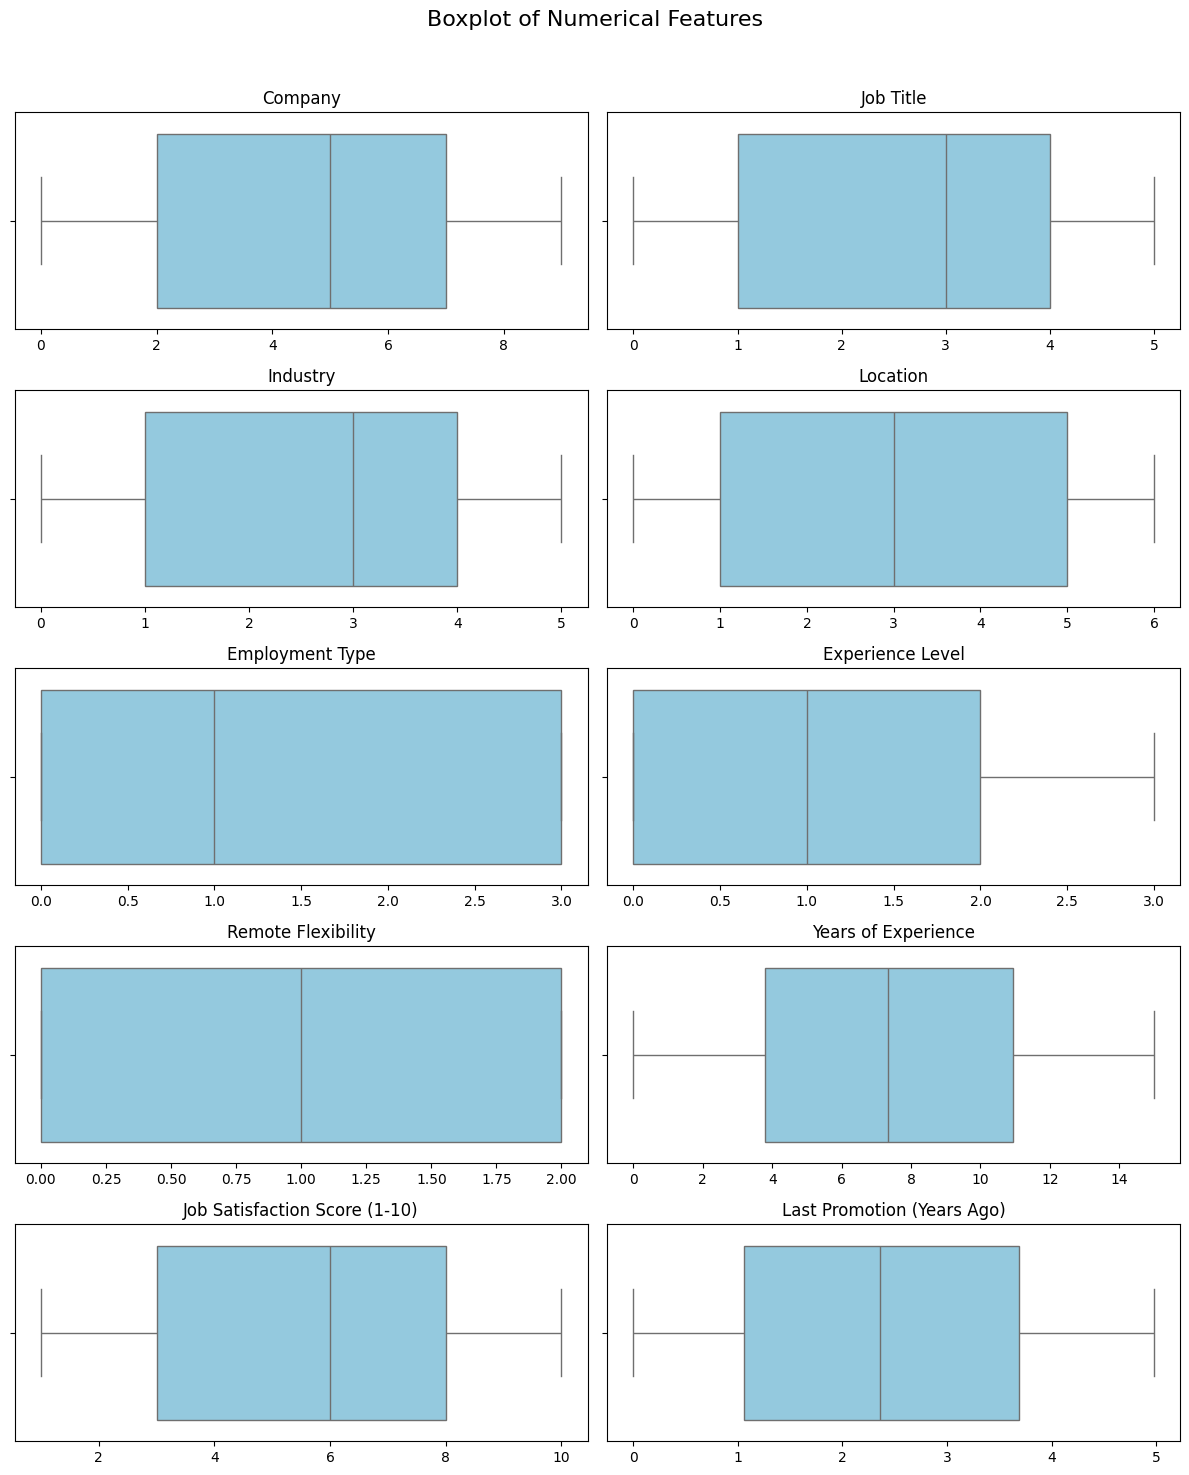

In [104]:
# Hitung jumlah baris dan kolom dinamis (misalnya grid 4x2 atau 3x4 tergantung jumlah fitur)
n_features = len(indicators_feature)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Buat grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Plot tiap fitur
for i, feature in enumerate(indicators_feature):
    sns.boxplot(data=df_transformed, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot kosong
for j in range(len(indicators_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [105]:
# Inisialisasi DataFrame untuk outlier
outliers = pd.DataFrame()

# Loop semua kolom (karena semua numerik)
for col in df_transformed.columns:
    Q1 = df_transformed[col].quantile(0.25)
    Q3 = df_transformed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ambil baris yang merupakan outlier
    outlier_rows = df_transformed[(df_transformed[col] < lower_bound) | (df_transformed[col] > upper_bound)]
    outliers = pd.concat([outliers, outlier_rows], axis=0)

# Hilangkan duplikat baris jika satu baris adalah outlier di banyak kolom
outliers = outliers.drop_duplicates()

# Tampilkan hasil
print(f"Jumlah baris outlier terdeteksi: {len(outliers)}")
outliers.head()


Jumlah baris outlier terdeteksi: 0


,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Years of Experience,Job Satisfaction Score (1-10),Last Promotion (Years Ago),Salary (USD)


**Insight**
<br>Tidak ada missing value, data duplikat, dan outlier

## **Data Cleansing**

Tidak melakukan data cleansing karena dataset sudah bersih

# **EDA**

### **Univariative Analysis**

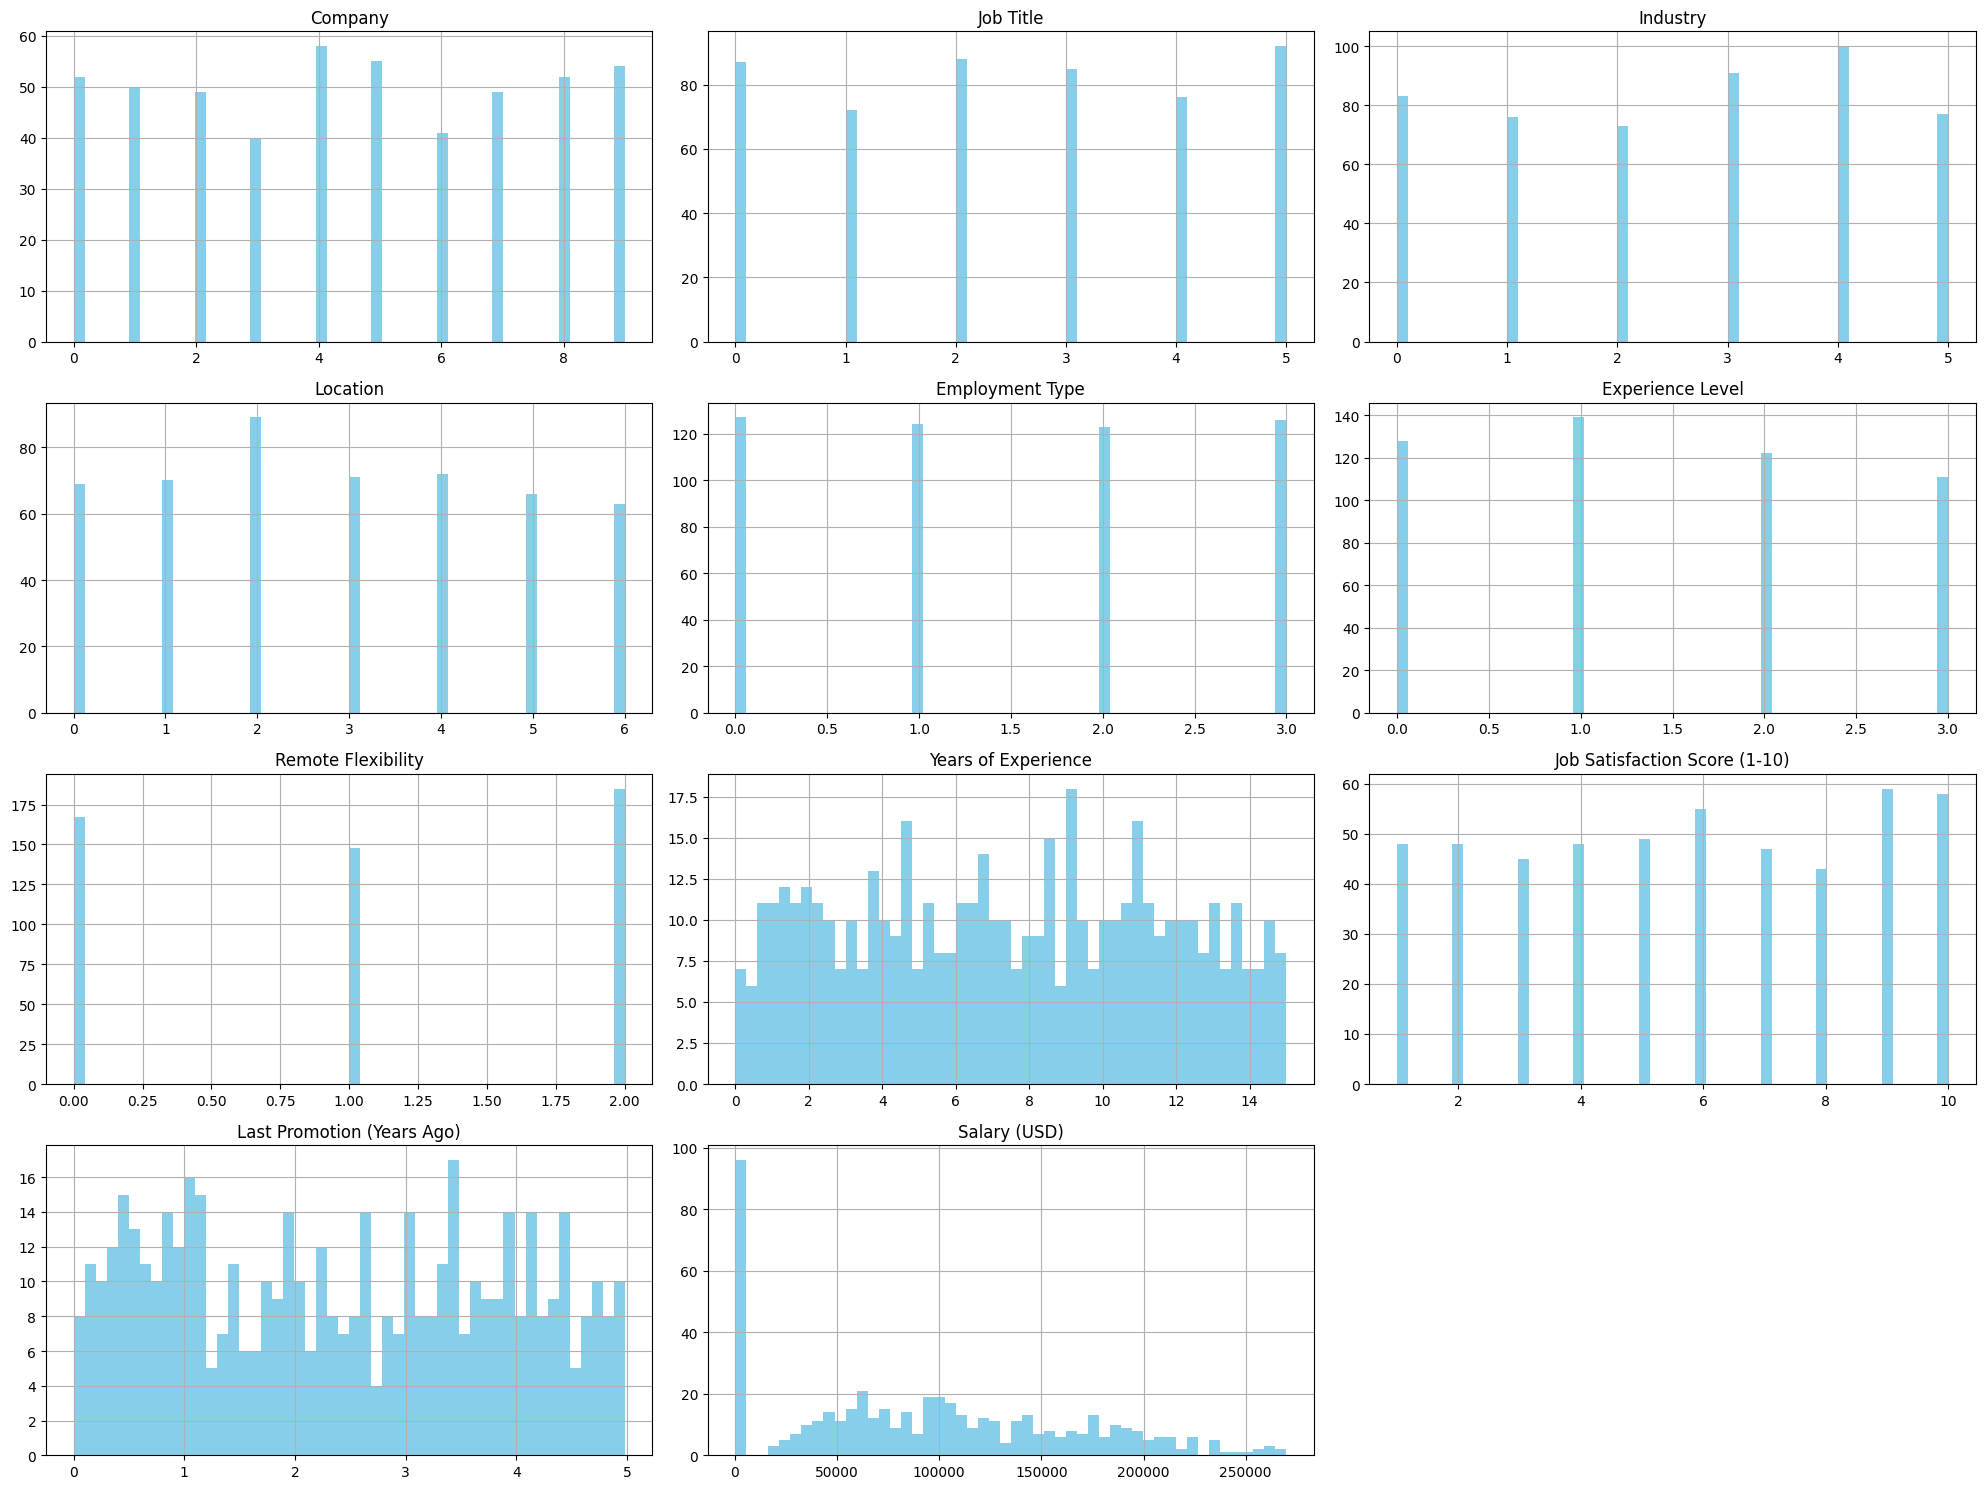

In [106]:
df_transformed.hist(bins=50, figsize=(20,15), color= 'skyblue')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

**Insight**
1. Secara keseluruhan, pada data ini distribusinya cukup merata di tiap kolom
2. Years of Experience: Distribusi pengalaman tersebar cukup merata dari 0 hingga sekitar 15 tahun, namun sedikit lebih rendah pada tahun-tahun awal (0-2 tahun) dan sekitar 5-7 tahun.
3. Job Satisfaction Score (1-10): Skor kepuasan kerja juga relatif merata di seluruh rentang 1 hingga 10, menunjukkan beragam tingkat kepuasan tanpa satu skor yang mendominasi.
4. Last Promotion (Years Ago): Mayoritas promosi terjadi dalam 0-1 tahun terakhir, menunjukkan pola promosi yang relatif sering atau baru saja terjadi di antara para pekerja di dataset
5. Salary (USD): Mayoritas gaji terkonsentrasi pada rentang yang lebih rendah (di bawah $50.000), dengan distribusi yang sangat miring ke kanan, menunjukkan bahwa lebih banyak individu memiliki gaji rendah dibandingkan gaji tinggi dan ini berbeda dari visualisasi awal tadi. Hal ini dimungkinkan setelah disamakannya currency yang digunakan dan juga dipengaruhi konversi dari AUD dan INR yang cukup rendah. Karena pekerja yang menggunakan AUD dan INR cukup banyak jadi ini berpengaruh besar pada perubahan distribudi.
6. Sebagian besar variabel kategorikal/diskrit seperti Job Satisfaction Score, Company, Job Title, Industry, Location, Employment Type, dan Experience Level menunjukkan distribusi yang relatif seragam atau merata di antara kategori-kategori mereka.

### **Multivariative Analysis**

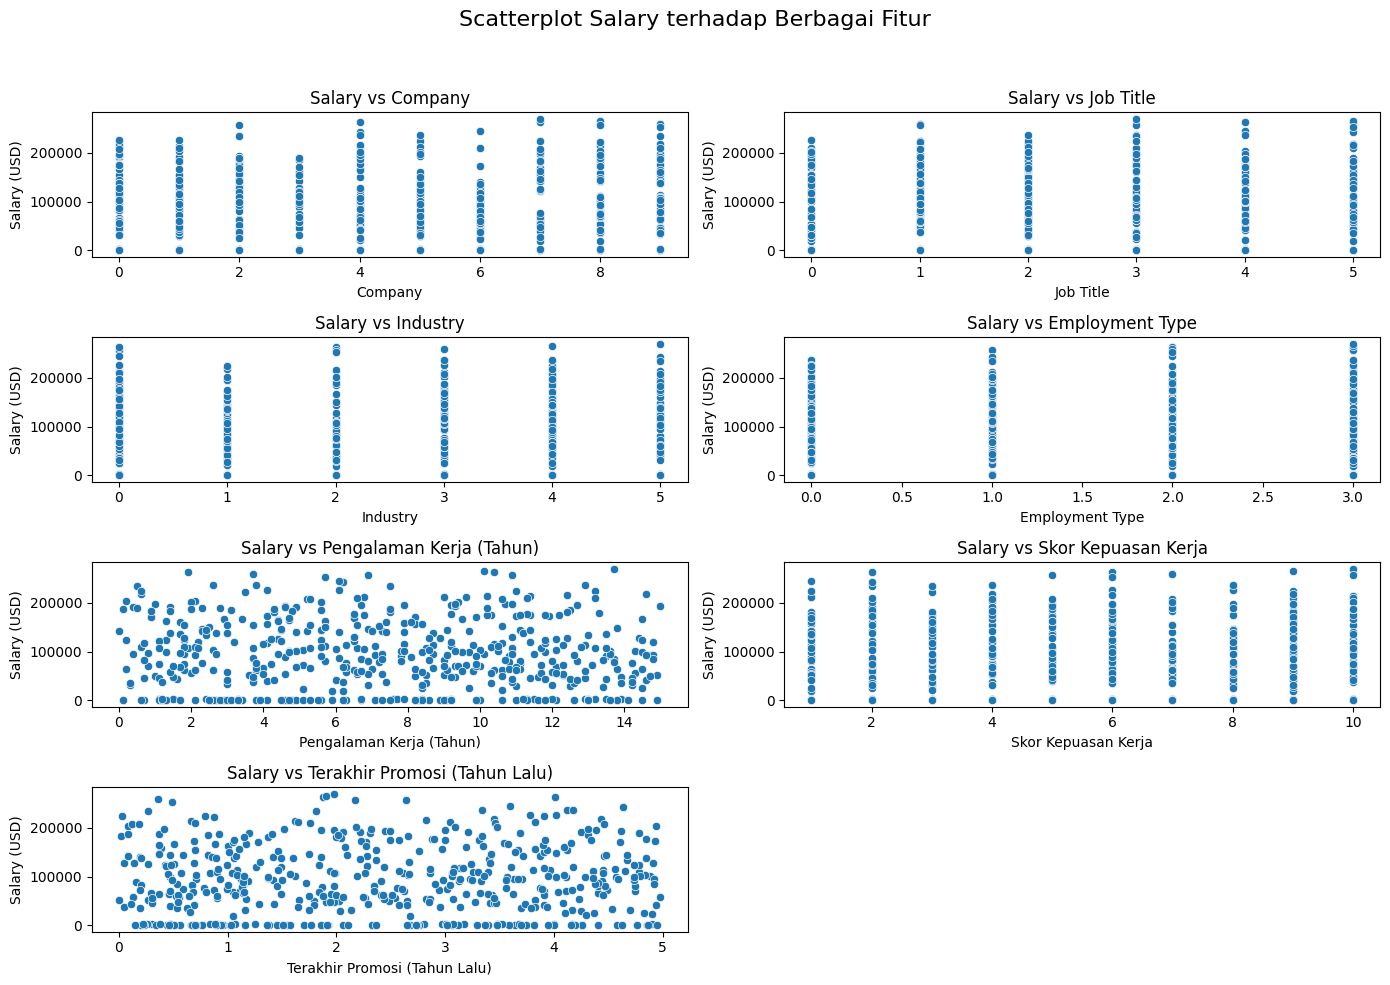

In [107]:
# Buat figure dan axes 2x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.suptitle("Scatterplot Salary terhadap Berbagai Fitur", fontsize=16)

# Flatten axes untuk looping
axes = axes.flatten()

# Daftar fitur yang akan dibandingkan dengan Salary
features = ["Company", "Job Title", "Industry", "Employment Type", 'Years of Experience', 'Job Satisfaction Score (1-10)', 'Last Promotion (Years Ago)']
titles = [
    "Company",
    "Job Title",
    "Industry",
    "Employment Type",
    "Pengalaman Kerja (Tahun)",
    "Skor Kepuasan Kerja",
    "Terakhir Promosi (Tahun Lalu)"
]

# Buat scatterplot di setiap subplot
for i, feature in enumerate(features):
    sns.scatterplot(data=df_transformed, x=feature, y='Salary (USD)', ax=axes[i])
    axes[i].set_title(f"Salary vs {titles[i]}")
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel("Salary (USD)")

# Kosongkan subplot ke-4 (karena cuma ada 3 fitur)
axes[7].axis('off')

# Tata letak agar tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Interpretasi data**
1. Gaji vs Perusahaan (Company):
<br>Tidak ada korelasi linear yang jelas atau pola signifikan yang terlihat. Gaji menunjukkan variasi yang sangat luas (dari rendah hingga tinggi) di setiap kategori perusahaan. Ini mengindikasikan bahwa gaji tidak ditentukan secara langsung oleh perusahaan, dan ada rentang gaji yang lebar dalam setiap perusahaan.

2. Gaji vs Posisi Pekerjaan (Job Title):
<br>Mirip dengan perusahaan, tidak ada korelasi linear yang jelas. Gaji sangat bervariasi di setiap kategori posisi pekerjaan. Ini menunjukkan bahwa gaji tidak secara langsung tergantung pada jenis posisi pekerjaan yang spesifik dalam konteks linear.

2. Gaji vs Industri (Industry):
<br>Tidak ada pola linear atau korelasi yang menonjol. Setiap kategori industri menunjukkan rentang gaji yang luas dari nilai rendah hingga tinggi. Ini berarti industri saja tidak secara langsung menunjukkan hubungan linear yang kuat dengan tingkat gaji.

2. Gaji vs Tipe Pekerjaan (Employment Type):
<br>Tidak ada korelasi linear yang jelas. Gaji memiliki variasi yang luas di setiap tipe pekerjaan. Ini mengindikasikan bahwa tipe pekerjaan tertentu tidak secara langsung berkorelasi secara linear dengan tingkat gaji.

2. Gaji vs Pengalaman Kerja (Tahun):
<br>Tidak ada korelasi linear positif yang kuat. Meskipun ada individu dengan pengalaman tinggi yang memiliki gaji tinggi, ada juga individu dengan pengalaman rendah yang memiliki gaji tinggi, dan sebaliknya. Titik-titik tersebar cukup acak, menunjukkan bahwa pengalaman kerja saja tidak selalu berkorelasi secara linear dengan gaji yang lebih tinggi.

2. Gaji vs Skor Kepuasan Kerja:
<br>Tidak ada pola linear atau korelasi yang jelas. Gaji menunjukkan rentang yang sangat luas untuk setiap skor kepuasan kerja. Artinya, gaji tidak berkorelasi secara linear dengan tingkat kepuasan kerja.

2. Gaji vs Terakhir Promosi (Tahun Lalu):
<br>Tidak ada korelasi linear yang jelas. Gaji bervariasi secara luas terlepas dari berapa tahun yang lalu seseorang terakhir dipromosikan. Seseorang yang baru dipromosikan bisa memiliki gaji rendah atau tinggi, sama seperti yang sudah lama tidak dipromosikan.

**Insight**
- Sebagian besar fitur individual yang diplot terhadap gaji (Perusahaan, Posisi Pekerjaan, Industri, Tipe Pekerjaan, Skor Kepuasan Kerja, Pengalaman Kerja, Terakhir Promosi) menunjukkan variasi gaji yang sangat luas dalam setiap kategorinya dan tidak ada korelasi linear yang kuat.
- Ini menyiratkan bahwa gaji kemungkinan besar dipengaruhi oleh kombinasi banyak faktor yang kompleks, dan tidak ada satu fitur pun dari yang ditampilkan yang secara tunggal memiliki hubungan linear langsung yang dominan dengan gaji.

# **Modelling**

Untuk menyelesaikan permasalahan prediksi **gaji tahunan (Salary USD)** berdasarkan fitur pekerjaan, dua algoritma regresi dipilih:
1. Random Forest Regressor
2. XGBoost Regressor

Keduanya dipilih karena mampu menangani:
- Data dengan banyak variabel kategorikal, terutama yang telah diubah menjadi numerik menggunakan LabelEncoder.
- Non-linear relationship antara fitur dan target.




## Data Spliting

In [108]:
X = df_transformed.drop(columns='Salary (USD)', errors='ignore')
y = df_transformed['Salary (USD)']

# Split data untuk regresi (tanpa stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
print("Jumlah data total:", len(X))
print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))

Jumlah data total: 500
Jumlah data training: 350
Jumlah data testing : 150


## Random Forest

Random Forest cocok digunakan karena dataset ini memiliki banyak fitur kategorikal yang sudah diubah ke bentuk numerik menggunakan Label Encoding.
Model ini tidak sensitif terhadap urutan angka hasil encoding, sehingga tetap dapat menghasilkan prediksi yang baik. Selain itu, jumlah kategori pada setiap fitur tidak terlalu banyak (umumnya <10), sehingga kompleksitas model tetap terjaga.

### Training Model

In [110]:
# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)

# Latih model dengan data train
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Prediksi

In [111]:
# Melakukan prediksi
y_pred_rf = rf_model.predict(X_test)

### Evaluasi Model

In [112]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")

MAE: 61872.94
MSE: 5582956174.63
RMSE: 83568.78
R² Score: -0.129


Hasil Training Model Random Forest Regressor

1. MAE (Mean Absolute Error) sebesar 61.872 menunjukkan bahwa, secara rata-rata, prediksi gaji meleset sekitar $61.872 dari nilai sebenarnya.

2. MSE (Mean Squared Error) yang besar, yaitu 5.582.956.174, mengindikasikan adanya kesalahan prediksi besar pada beberapa sampel — karena MSE memperbesar pengaruh outlier.

3. RMSE (Root Mean Squared Error) sebesar 74.719 memperkuat bahwa model masih mengalami deviasi besar dalam memprediksi gaji, terutama untuk outlier atau data dengan nilai ekstrim.

4. R² Score bernilai -0.129, yang artinya model tidak mampu menjelaskan variasi data target lebih baik daripada rata-rata. Skor negatif ini mengindikasikan bahwa:

5. Model tidak berhasil menangkap pola dari data, bahkan lebih buruk dibandingkan jika hanya menebak rata-rata gaji untuk semua data.

**Insight**

1. Model gagal memahami kompleksitas hubungan antar fitur dengan gaji (Salary), kemungkinan besar karena:
- Dataset terlalu kecil
- Terlalu banyak fitur kategorikal yang belum cukup diolah.
- Data mungkin memiliki multikolinearitas atau noise tinggi.
- Skala antar fitur yang berbeda memengaruhi performa model.

2. Perlu eksplorasi lebih lanjut, seperti:
- Melakukan feature selection dan feature engineering.
- Menstandarisasi atau menormalisasi fitur numerik.
- Melakukan hyperparameter tuning pada Random Forest.

## XGBoost

XGBoost juga sesuai karena mampu menangani data kategorikal yang sudah di-label encoding dengan baik.
Model ini kuat terhadap data tabular seperti yang digunakan dalam proyek ini, dan memiliki kemampuan generalisasi yang baik, terutama jika dilakukan tuning hyperparameter. Jumlah kategori yang relatif sedikit juga membuat proses training lebih efisien.

### Training Model

In [113]:
# Inisialisasi dan latih model XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Prediksi

In [114]:
# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

### Evaluasi Model

In [115]:
# Evaluasi
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("=== Evaluasi Model XGBoost ===")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.3f}")

=== Evaluasi Model XGBoost ===
MAE: 67888.92
MSE: 6983741363.08
RMSE: 83568.78
R² Score: -0.412


Hasil Training Model XGBoost Regressor
1. MAE (Mean Absolute Error) sebesar 67.888 menunjukkan bahwa rata-rata kesalahan prediksi gaji model ini adalah sekitar $67.888, yang tergolong cukup besar untuk konteks prediksi gaji.
2. MSE (Mean Squared Error) dan RMSE (Root Mean Squared Error) masing-masing sebesar 6.983.741.363 dan 83.568, mengindikasikan bahwa terdapat banyak outlier atau prediksi yang jauh dari nilai sebenarnya.
3. R² Score negatif (-0.412) berarti model gagal dalam menangkap pola data, bahkan lebih buruk dibandingkan model baseline yang hanya memprediksi nilai rata-rata.

Performa ini menunjukkan bahwa XGBoost tidak memberikan hasil optimal pada dataset ini, kemungkinan karena:
1. Banyaknya fitur kategorikal hasil label encoding.
2. Pola hubungan antara fitur dan target salary mungkin terlalu kompleks untuk ditangkap tanpa feature engineering lebih lanjut atau tuning hyperparameter.

# Evaluation

## Metrik Evaluasi

Karena permasalahan ini adalah regresi (prediksi nilai kontinu Salary (USD)), maka metrik evaluasi yang digunakan adalah:
- Mean Absolute Error (MAE)
Mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual
![MAE](https://github.com/rfahreza/Predictive-Analytic/blob/main/MAE.png?raw=true)
<br>Semakin kecil MAE, semakin baik model dalam memprediksi nilai.

- Mean Squared Error (MSE)
Mengukur rata-rata selisih kuadrat antara nilai prediksi dan aktual.
![MSE](https://github.com/rfahreza/Predictive-Analytic/blob/main/MSE.png?raw=true)
<br>MSE memberikan penalti lebih besar untuk error yang besar (karena dikuadratkan).

- Root Mean Squared Error (RMSE)
Akar dari MSE. Metrik ini juga mempertimbangkan error besar tapi memiliki satuan yang sama dengan target (USD), sehingga mudah ditafsirkan.<br>
![RMSE](https://github.com/rfahreza/Predictive-Analytic/blob/main/RMSE.png?raw=true)


- R-Squared (R² Score)
Mengukur seberapa baik model menjelaskan variasi data.<br>
![R-Squared](https://github.com/rfahreza/Predictive-Analytic/blob/main/R-Squared.png?raw=true)
<br>Nilai R² berkisar antara negatif tak hingga sampai 1. Nilai mendekati 1 berarti model menjelaskan variansi dengan baik, sedangkan nilai negatif menunjukkan model lebih buruk dari baseline (mean target saja).

## Perbandingan Model

In [116]:
# Masukkan ke dalam dictionary
scores = {
    "Random Forest": [mae_rf, rmse_rf, r2_rf],
    "XGBoost": [mae_xgb, rmse_xgb, r2_xgb]
}

# Buat DataFrame
score_df = pd.DataFrame(scores, index=["MAE", "RMSE", "R²"]).T
print(score_df)

                        MAE          RMSE        R²
Random Forest  61872.943346  83568.782228 -0.129170
XGBoost        67888.920777  83568.782228 -0.412483


Perbandingan Model Regresi
1. Random Forest lebih unggul dari XGBoost dalam memprediksi gaji (Salary (USD)), ditunjukkan dari nilai:
- MAE lebih kecil: 61.872 vs 67.888 → rata-rata kesalahan prediksi Random Forest lebih kecil sekitar $6.000.
- R² Score lebih tinggi: -0.129 vs -0.412 → meskipun keduanya masih memiliki skor negatif (artinya performanya lebih buruk dari rata-rata), Random Forest masih lebih "dekat" menuju model yang baik.
2. RMSE sama pada kedua model: ±83.568 → menunjukkan bahwa keduanya menghasilkan penyebaran error yang cukup besar terhadap nilai aktual.
3. Nilai R² negatif pada kedua model mengindikasikan bahwa model belum mampu menjelaskan variansi dari target Salary (USD) dengan baik. Ini bisa disebabkan oleh:

**Insight**
<br>Random Forest lebih cocok untuk dataset ini dibandingkan XGBoost, walaupun keduanya masih perlu ditingkatkan.
